In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv('readability_scores_included_train.csv')

In [3]:
data.head()

,Unnamed: 0,original_text,label,clean_text,dale_chall_score,flesch reading ease score,gunning fog,flesch kincaid grade level,coleman liau index,smog index,automated readability index,linsear write formula
0,0,There is manuscript evidence that Austen conti...,1,manuscript evidence austen continued work piec...,0.063579,41.37,20.46,16.9,8.77,0.0,19.0,26.5
1,1,"In a remarkable comparative analysis , Mandaea...",1,remarkable comparative analysis mandaean schol...,0.105135,24.78,17.92,15.0,18.10,0.0,18.7,16.5
2,2,"Before Persephone was released to Hermes , who...",1,persephone released hermes sent retrieve hades...,0.056000,37.31,20.61,18.5,10.52,0.0,22.3,27.0
3,3,Cogeneration plants are commonly found in dist...,1,cogeneration plants commonly found district he...,0.090344,5.16,20.30,20.5,19.74,0.0,25.2,25.5
4,4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,geneva lrb rrb secondmostpopulous city switzer...,0.067169,26.14,12.63,16.6,12.65,0.0,20.5,21.0


In [4]:
import re
import nltk
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
  
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()

    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
#     if len(text)==0:
#         return 'simple'
    return text
nltk.download('stopwords')
nltk.download('wordnet')
lst_stopwords = nltk.corpus.stopwords.words("english")
data["clean_text"] = data["original_text"].apply(lambda row: \
          preprocess_text(row, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hkarthik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hkarthik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
corpus = data['clean_text']

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = str(string).split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

# ## detect bigrams and trigrams
# bigrams_detector_phrases = gensim.models.phrases.Phrases(lst_corpus, delimiter=" ".encode(), min_count=5, threshold=10)
# bigrams_detector_phraser = gensim.models.phrases.Phraser(bigrams_detector_phrases)

# trigrams_detector_phrases = gensim.models.phrases.Phrases(bigrams_detector_phraser[lst_corpus], delimiter=" ".encode(), min_count=5, threshold=10)
# trigrams_detector_phraser = gensim.models.phrases.Phraser(trigrams_detector_phrases)

In [8]:
data['clean_length'] = data['clean_text'].apply(lambda text: len(str(text).split()))

In [9]:
data.head()

,Unnamed: 0,original_text,label,clean_text,dale_chall_score,flesch reading ease score,gunning fog,flesch kincaid grade level,coleman liau index,smog index,automated readability index,linsear write formula,clean_length
0,0,There is manuscript evidence that Austen conti...,1,manuscript evidence austen continued work piec...,0.063579,41.37,20.46,16.9,8.77,0.0,19.0,26.5,21
1,1,"In a remarkable comparative analysis , Mandaea...",1,remarkable comparative analysis mandaean schol...,0.105135,24.78,17.92,15.0,18.10,0.0,18.7,16.5,14
2,2,"Before Persephone was released to Hermes , who...",1,persephone released hermes sent retrieve hades...,0.056000,37.31,20.61,18.5,10.52,0.0,22.3,27.0,21
3,3,Cogeneration plants are commonly found in dist...,1,cogeneration plant commonly found district hea...,0.090344,5.16,20.30,20.5,19.74,0.0,25.2,25.5,27
4,4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,geneva lrb rrb secondmostpopulous city switzer...,0.067169,26.14,12.63,16.6,12.65,0.0,20.5,21.0,17


<AxesSubplot:>

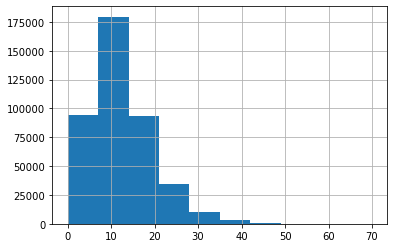

In [10]:
data['clean_length'].hist()

In [11]:
# Majority of the clean data is within the 30 word length
from tensorflow.keras import models, layers, preprocessing as kpreprocessing
from tensorflow.keras import backend as kbackend

In [32]:

# tokenize text
tokenizer = kpreprocessing.text.Tokenizer(lower=True, split=' ', oov_token="NaN", \
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index

## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kpreprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=30, padding="post", truncating="post")

In [33]:
X_train.shape

(416768, 30)

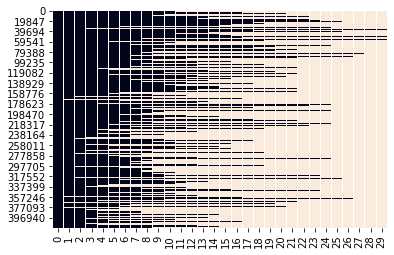

In [34]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

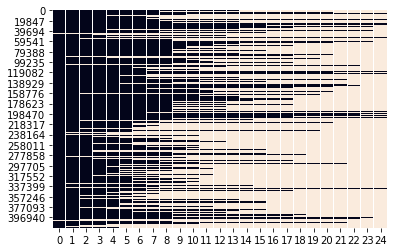

In [12]:
#Only few exceed 25. So let's stick to 25 word length
# tokenize text
tokenizer = kpreprocessing.text.Tokenizer(lower=True, split=' ', oov_token="NaN", \
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kpreprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=25, padding="post", truncating="post")
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [13]:
import gensim
# gensim word vector model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

In [14]:
# Creating the embedding matrix
# Matrix of embedding that will be used as a weight matrix in the neural network classifier
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  model[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [15]:
embeddings.shape

(153934, 300)

In [31]:
!pip install keras_metrics
import keras_metrics


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 11.6 MB/s eta 0:00:01


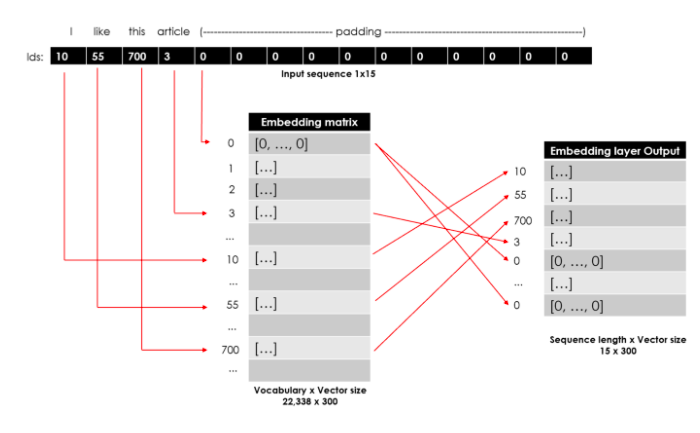

In [32]:
from keras.layers import Conv1D, MaxPooling1D
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="sigmoid")(x)
    x = layers.Permute((2,1))(x)
    x = layers.multiply([inputs, x])
    return x

# ## input
x_in = layers.Input(shape=(25,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=25, trainable=False)(x_in)


# ## apply attention
# x = attention_layer(x, neurons=25)

## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=25,
                         return_sequences=True))(x)


x = layers.Bidirectional(layers.LSTM(units=25, 
                         return_sequences=True))(x)

x = attention_layer(x, neurons=25)

x = layers.Bidirectional(layers.LSTM(units=25))(x)



## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(1, activation='sigmoid')(x)

## compile
model = models.Model(x_in, y_out)
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy',keras_metrics.recall()])

#model.summary()

In [33]:
# Recreating X_train
X_train = kpreprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=25, padding="post", truncating="post")
y_train = np.array(data['label'])

In [34]:
## training 
from sklearn.model_selection import train_test_split
y_train = np.array(data['label'])
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.00001, random_state=42)
training = model.fit(x=X_train, y=y_train, batch_size=32, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.2)

/sw/arcts/centos7/python3.8-anaconda/2021.05/tensorflow/2.5.0/lib/python3.8/site-packages/keras/engine/base_layer.py:1307: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


9899/9899 [==============================] - 284s 28ms/step - loss: 0.5834 - accuracy: 0.6832 - recall: 0.6977 - val_loss: 0.5659 - val_accuracy: 0.6939 - val_recall: 0.7053


In [35]:
training = model.fit(x=X_train, y=y_train, batch_size=16, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.1)

11136/11136 [==============================] - 294s 26ms/step - loss: 0.5560 - accuracy: 0.7029 - recall: 0.7098 - val_loss: 0.5520 - val_accuracy: 0.7046 - val_recall: 0.7158


In [36]:
training = model.fit(x=X_train, y=y_train, batch_size=64, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.1)

2784/2784 [==============================] - 79s 28ms/step - loss: 0.5387 - accuracy: 0.7149 - recall: 0.7210 - val_loss: 0.5477 - val_accuracy: 0.7088 - val_recall: 0.7238


In [37]:
training = model.fit(x=X_train, y=y_train, batch_size=32, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.2)
# run this for ten epochs and submit to kaggle


9899/9899 [==============================] - 274s 28ms/step - loss: 0.5379 - accuracy: 0.7153 - recall: 0.7257 - val_loss: 0.5425 - val_accuracy: 0.7137 - val_recall: 0.7263


In [ ]:
training = model.fit(x=X_train, y=y_train, batch_size=32, 
                     epochs=10, shuffle=True, verbose=1,
                    validation_split=0.2)
# Done :)
# Not rerun during final code cleaning to save time 

In [38]:
training = model.fit(x=X_train, y=y_train, batch_size=16, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.2)

9899/9899 [==============================] - 274s 28ms/step - loss: 0.5270 - accuracy: 0.7230 - recall: 0.7272 - val_loss: 0.5445 - val_accuracy: 0.7134 - val_recall: 0.7295


In [39]:
training = model.fit(x=X_train, y=y_train, batch_size=64, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.2)

9899/9899 [==============================] - 274s 28ms/step - loss: 0.5169 - accuracy: 0.7301 - recall: 0.7318 - val_loss: 0.5429 - val_accuracy: 0.7124 - val_recall: 0.7333


In [40]:
data2 = pd.read_csv('readability_scores_included_test.csv')

In [68]:
# Get the test data in the corpus
data2['clean_text'] = data2["original_text"].apply(lambda row: \
          preprocess_text(row, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
corpus = data2['clean_text']

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = str(string).split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_test = kpreprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=25, padding="post", truncating="post")
pred = model.predict(X_test)

In [69]:
predictions = [1 if value>0.5 else 0 for value in pred]

In [70]:
datax = data2[['id','original_text']]
datax['label'] = predictions
datax = datax.drop(axis=1,columns=['original_text'])

<ipython-input-70-88408b618f03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['label'] = predictions


,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [71]:
datax['label'].to_csv('submission1.csv') 

In [126]:
datax = data2['id']

In [129]:
datax['pred'] = np.array(predictions)

In [44]:
# create the model
from keras import Sequential
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers import Conv1D, MaxPooling1D


def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="sigmoid")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

model = Sequential()

model.add(Input(shape=(25,)))
model.add(Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=25, trainable=False))

# model.add(attention_layer(model, neurons=25))

model.add(layers.Bidirectional(layers.LSTM(units=25,
                         return_sequences=True)))

model.add(layers.Bidirectional(layers.LSTM(units=25,
                         return_sequences=True)))

model.add(Conv1D(filters=25, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(layers.Bidirectional(layers.LSTM(units=25,)))



model.add(Dense(64,activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',keras_metrics.recall()])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 300)           46180200  
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 25, 50)            65200     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 25, 50)            15200     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 25)            3775      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 25)            0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 50)                10200     
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [42]:
# Recreating X_train
X_train = kpreprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=25, padding="post", truncating="post")
y = np.array(data['label'])
#X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.000001, random_state=0)
# training = model.fit(x=X_train, y=y_train, batch_size=128, 
#                      epochs=10, shuffle=True, verbose=1, 
#                       validation_split=0.2)

In [45]:
training = model.fit(x=X_train, y=y_train, batch_size=16, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.1)

23444/23444 [==============================] - 583s 25ms/step - loss: 0.5963 - accuracy: 0.6718 - recall: 0.6864 - val_loss: 0.5623 - val_accuracy: 0.6982 - val_recall: 0.7122


In [46]:
training = model.fit(x=X_train, y=y_train, batch_size=32, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.1)

11722/11722 [==============================] - 298s 25ms/step - loss: 0.5502 - accuracy: 0.7064 - recall: 0.7181 - val_loss: 0.5524 - val_accuracy: 0.7053 - val_recall: 0.7228


In [47]:
training = model.fit(x=X_train, y=y_train, batch_size=64, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.1)

5861/5861 [==============================] - 155s 26ms/step - loss: 0.5369 - accuracy: 0.7160 - recall: 0.7260 - val_loss: 0.5467 - val_accuracy: 0.7079 - val_recall: 0.7283


In [48]:
training = model.fit(x=X_train, y=y_train, batch_size=16, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.2)

20839/20839 [==============================] - 537s 26ms/step - loss: 0.5363 - accuracy: 0.7164 - recall: 0.7297 - val_loss: 0.5411 - val_accuracy: 0.7137 - val_recall: 0.7309


In [49]:
training = model.fit(x=X_train, y=y_train, batch_size=32, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.2)

10420/10420 [==============================] - 280s 27ms/step - loss: 0.5205 - accuracy: 0.7270 - recall: 0.7327 - val_loss: 0.5368 - val_accuracy: 0.7162 - val_recall: 0.7335


In [50]:
training = model.fit(x=X_train, y=y_train, batch_size=64, 
                     epochs=1, shuffle=True, verbose=1,
                    validation_split=0.2)

5210/5210 [==============================] - 146s 28ms/step - loss: 0.5074 - accuracy: 0.7353 - recall: 0.7348 - val_loss: 0.5382 - val_accuracy: 0.7166 - val_recall: 0.7367
